# Proyecto 2 

github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
# from statsmodels.graphics.gofplots import qqplot
# from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
# import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

## Cargado de datos

In [32]:
df = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print("train set: " + str(df.shape))
print("test set: " + str(test.shape))

train set: (1460, 81)
test set: (1459, 80)


Para propósito de estudios la fuente de datos ya **se encontraba separada** en conjuntos para entrenamiento y testeo, así que se planea respetar esa división, como se puede ver se tiene una distribución de **equitativa** para ambos grupos, es decir 50% 50%

## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Primero, es importante eliminar las filas que contienen datos incompletos. Para ello, contaremos cuántos valores nulos hay en cada columna. Esto nos permitirá determinar si la cantidad de filas con valores faltantes es insignificante. Si encontramos columnas con un número excesivo de valores nulos (según nuestro criterio, más de 40), estas deberán ser eliminadas.

In [33]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAValues2 = [(col, count, (count / len(test)) * 100) for col, count in test.isnull().sum().items() if count > 0]

print(NAValues)
print(NAValues2)

[('LotFrontage', 259, 17.73972602739726), ('Alley', 1369, 93.76712328767123), ('MasVnrType', 872, 59.726027397260275), ('MasVnrArea', 8, 0.547945205479452), ('BsmtQual', 37, 2.5342465753424657), ('BsmtCond', 37, 2.5342465753424657), ('BsmtExposure', 38, 2.6027397260273974), ('BsmtFinType1', 37, 2.5342465753424657), ('BsmtFinType2', 38, 2.6027397260273974), ('Electrical', 1, 0.0684931506849315), ('FireplaceQu', 690, 47.26027397260274), ('GarageType', 81, 5.5479452054794525), ('GarageYrBlt', 81, 5.5479452054794525), ('GarageFinish', 81, 5.5479452054794525), ('GarageQual', 81, 5.5479452054794525), ('GarageCond', 81, 5.5479452054794525), ('PoolQC', 1453, 99.52054794520548), ('Fence', 1179, 80.75342465753424), ('MiscFeature', 1406, 96.30136986301369)]
[('MSZoning', 4, 0.2741603838245374), ('LotFrontage', 227, 15.558601782042494), ('Alley', 1352, 92.66620973269363), ('Utilities', 2, 0.1370801919122687), ('Exterior1st', 1, 0.06854009595613435), ('Exterior2nd', 1, 0.06854009595613435), ('MasVn

### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* Alley → 93.77% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* PoolQC → 99.52% de datos nulos.
* Fence → 80.75% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [ ]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
test.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()
test_cleaned = test.dropna()

In [35]:
# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

In [36]:
# Asegurar que no hayan valores nulos
NAValues2 = list(test_cleaned.isnull().sum() / len(test_cleaned))
list(value for value in NAValues if value > 0)

[]

Después de obtener un dataset más limpio, el siguiente paso fue analizar su estructura con mayor detalle. Para ello, verificamos la cantidad de filas y columnas restantes, lo que nos permitió entender la dimensión de los datos después del proceso de limpieza.

Además, realizamos una nueva inspección en busca de datos duplicados, junto con los tipos de datos para tener una mejor compresion y asi para evitar cualquier tipo de sesgo.

In [39]:
print("=====TRAINING====")
print("Shape: ",df_cleaned.shape)
print("Duplicados: ",df.duplicated().sum())
print(df_cleaned.dtypes.value_counts())

print("====TEST=====")
print("Shape: ", test_cleaned.shape)
print("Duplicados: ",df.duplicated().sum())
print(df_cleaned.dtypes.value_counts())

=====TRAINING====
Shape:  (1094, 73)
Duplicados:  0
object     36
int64      34
float64     3
Name: count, dtype: int64
====TEST=====
Shape:  (1109, 72)
Duplicados:  0
object     36
int64      34
float64     3
Name: count, dtype: int64


Se puede observar que poco menos de 1/3 de los datos en ambos data sets fue eliminado por la presencia de datos N/A que no se cree aportaran a la predicción.

### Análisis exploratorio

A continuación se investigara más sobre patrones que emergen del set de datos. Para ello primero es indispensables unir los datos en un solo data set, para ello __se ignorara la columan de precios__

In [42]:
trainWithNoPrice = df_cleaned.drop(columns=['SalePrice'])
allData = pd.concat([df_cleaned, df_cleaned], ignore_index=True)

allData.shape

(2188, 73)

Empezaremos por separar a las variables numericas de las qualitativas

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

categorical_cols = df.select_dtypes(exclude=['number']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',

__¿Cuales son los valores más comones para las variables categóricas?__

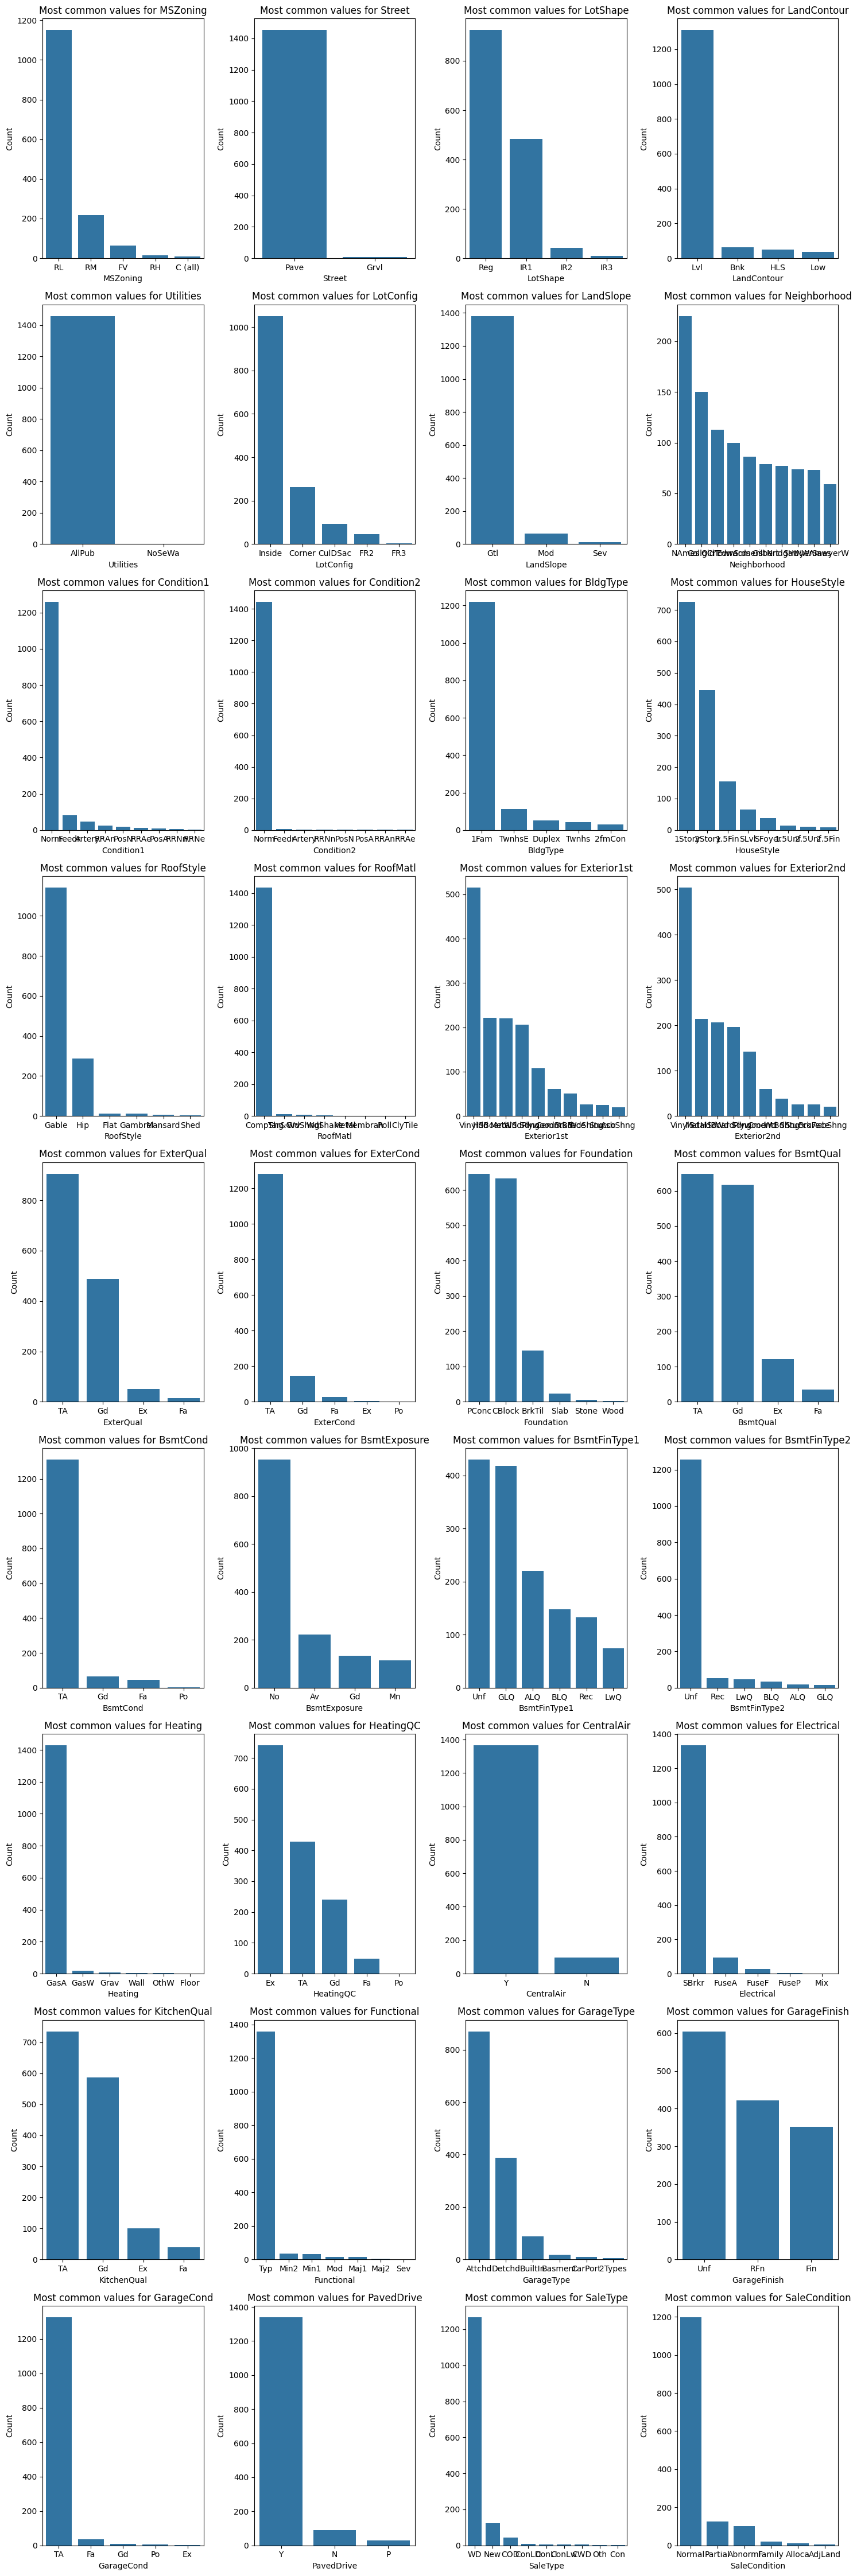

In [63]:
# Set the figure size and number of rows/columns based on the number of variables
num_vars = len(categorical_cols)
num_cols = 4  # You can adjust this number to fit your screen/figure
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical variable
for i, var in enumerate(categorical_cols):
    # Plot the top 10 most frequent categories
    sns.countplot(data=df, x=var, ax=axes[i], order=df[var].value_counts().index[:10])
    
    # Set plot title and labels
    axes[i].set_title(f"Most common values for {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

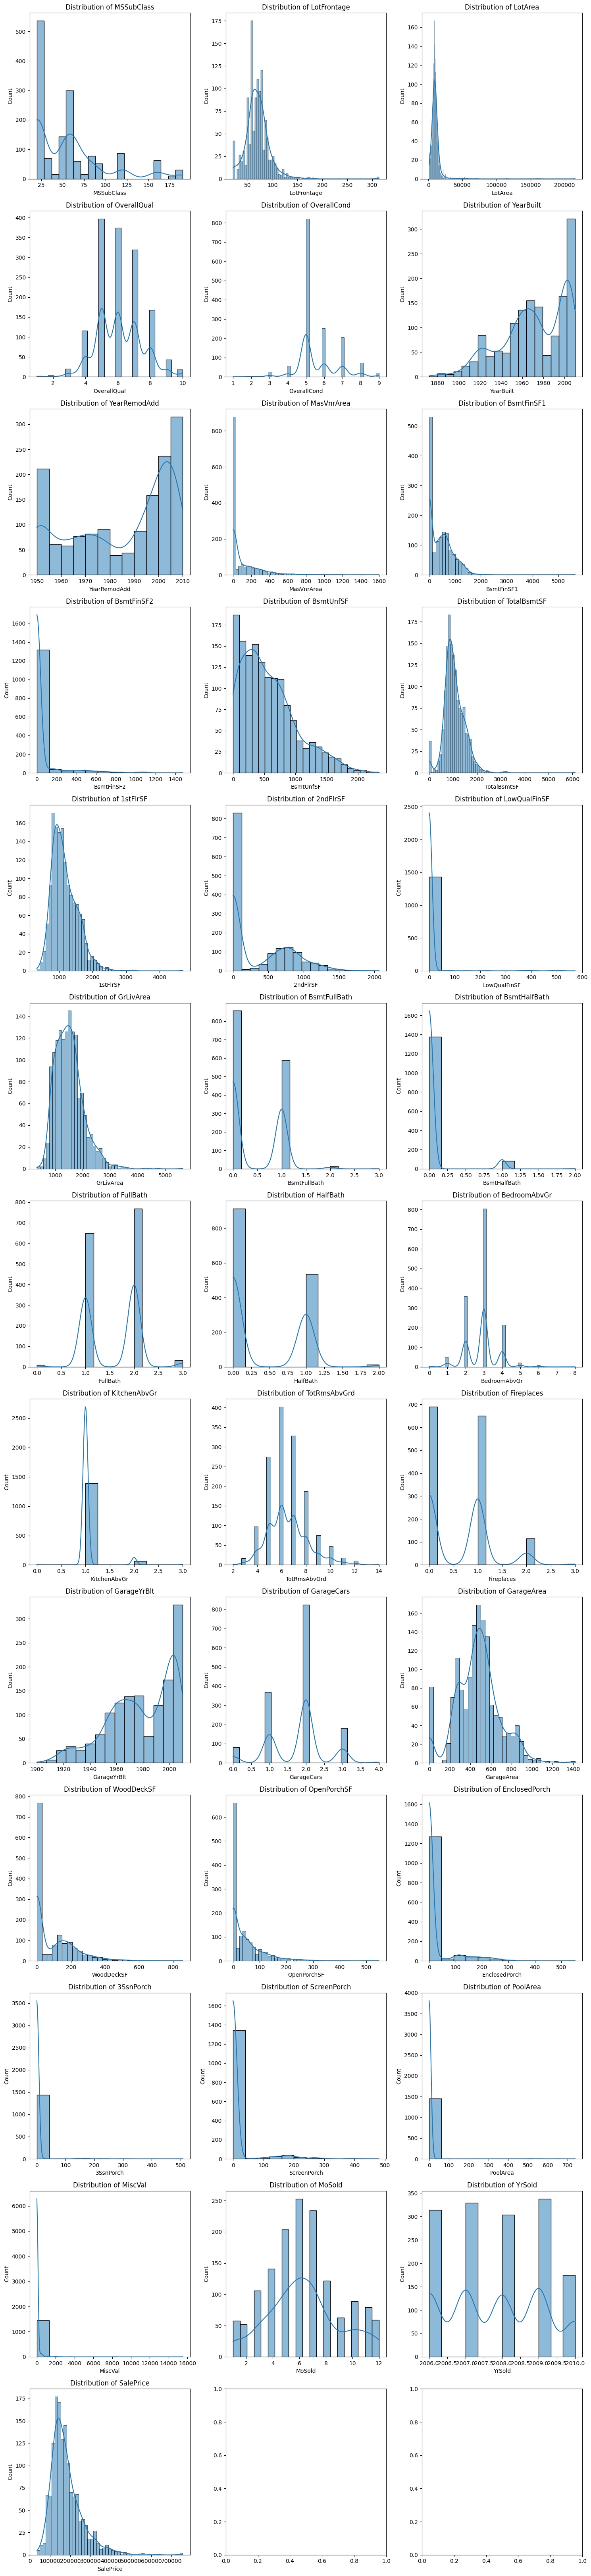

In [69]:
# Set the figure size and number of rows/columns based on the number of variables
num_vars = len(numeric_cols)
num_cols = 3  # You can adjust this number to fit your screen/figure
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each variable and plot it in the corresponding subplot
for i, var in enumerate(numeric_cols):
    sns.histplot(df[var], kde=True, ax=axes[i])

    # Set the plot title
    axes[i].set_title(f"Distribution of {var}")
    
    # Adjust the x-axis scale to fit the data range
    x_min, x_max = df[var].min(), df[var].max()
    buffer = (x_max - x_min) * 0.05  # 5% buffer on each side (can adjust the factor)
    axes[i].set_xlim(x_min - buffer, x_max + buffer)
    
    # Adjust the y-axis scale to fit the plot
    axes[i].set_ylim(0, axes[i].get_ylim()[1])  # Keep y-axis auto-scaling but prevent negative values

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Se puede observar que en resultados numericos, las variables de SalePrice, garage area, totalBSMFT, parkingLotArea, estan distribuidas normalmente, mientras que otras a pesar de ser numericas, parecen funcionar más como una variable categorica como el "número de pisos". Por otro lado para las varaibles cuantitativas se descubrio datos interesante de su frecuencia, com oque la gran mayoria tienen 2 pisos, son de concreto y utilizan un sistema electrico estándar.

__Como varia el coste venta entre diferentes vecinarios?__

Vecintarios como niridgHt o StoneBr son los que tienen mayores rangos de precios, pero tambien aquellos con más varianza, asi que a pesar de ser vecindarios caros, cuenatn con viviendas accesibles. De lo contrario gran cantidad de los barrios tienen poca variabilidad ($100000 de diferencia entre la vivienda mas barata y la mas cara aproximadamente.) y suelen estar en los precios mas bajos.

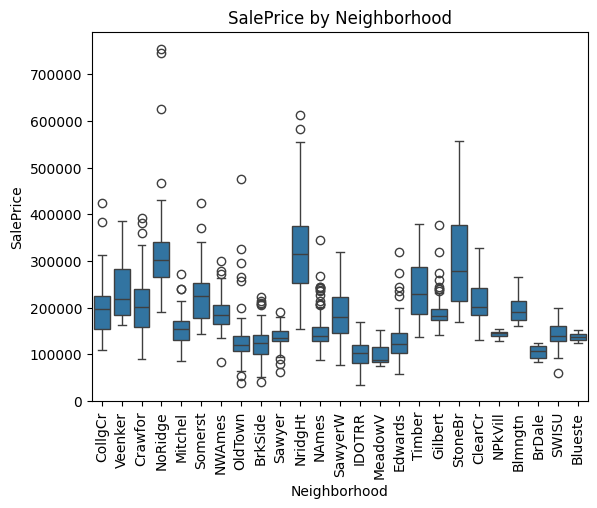

In [75]:
# Boxplot to see SalePrice across different Neighborhoods
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title("SalePrice by Neighborhood")
plt.xticks(rotation=90)
plt.show()

__¿Estará el tiempo de venta relacionado en las ventas?__
Por el diagrama de cajas y bigotes, podemos ver que las cajas se traslapan mucho, tanto entre meses como años, lo que indica que el mes y año no afecta de forma importante el precio de las ventas.

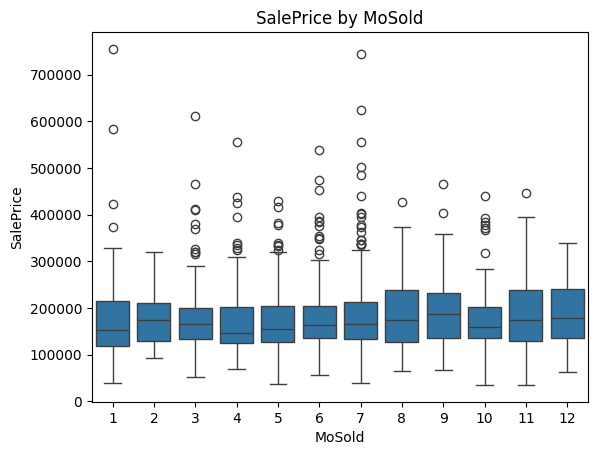

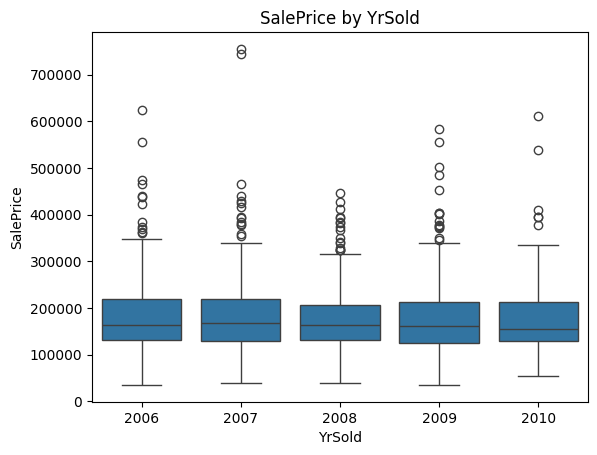

Average SalePrice by Year:
YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64


In [71]:
# Boxplot for MoSold vs SalePrice
sns.boxplot(x='MoSold', y='SalePrice', data=df)
plt.title("SalePrice by MoSold")
plt.show()

# Boxplot for YrSold vs SalePrice
sns.boxplot(x='YrSold', y='SalePrice', data=df)
plt.title("SalePrice by YrSold")
plt.show()

# Checking trends by year
sale_by_year = df.groupby('YrSold')['SalePrice'].mean()
print(f"Average SalePrice by Year:\n{sale_by_year}")

__¿Son casas mas grandes mas costosas?__
De acuerdo a la gráfica inferior se puede concluir que, si, normalmente las casas mas grande son más caras.

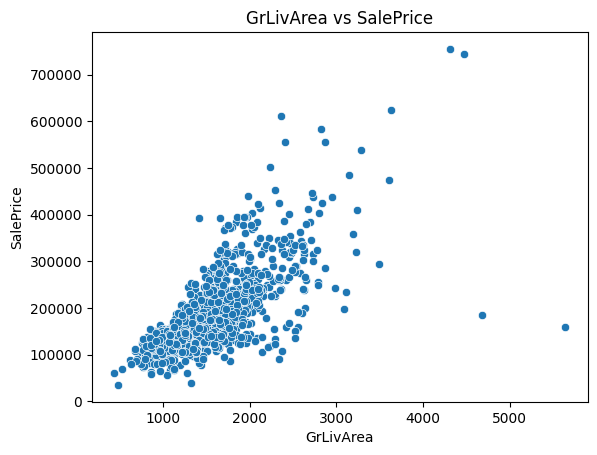

Correlation between GrLivArea and SalePrice: 0.7074814244872486


In [70]:
# Scatterplot for GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleaned)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Checking correlation
print(f"Correlation between GrLivArea and SalePrice: {df_cleaned['GrLivArea'].corr(df_cleaned['SalePrice'])}")

### Analisis de grupos

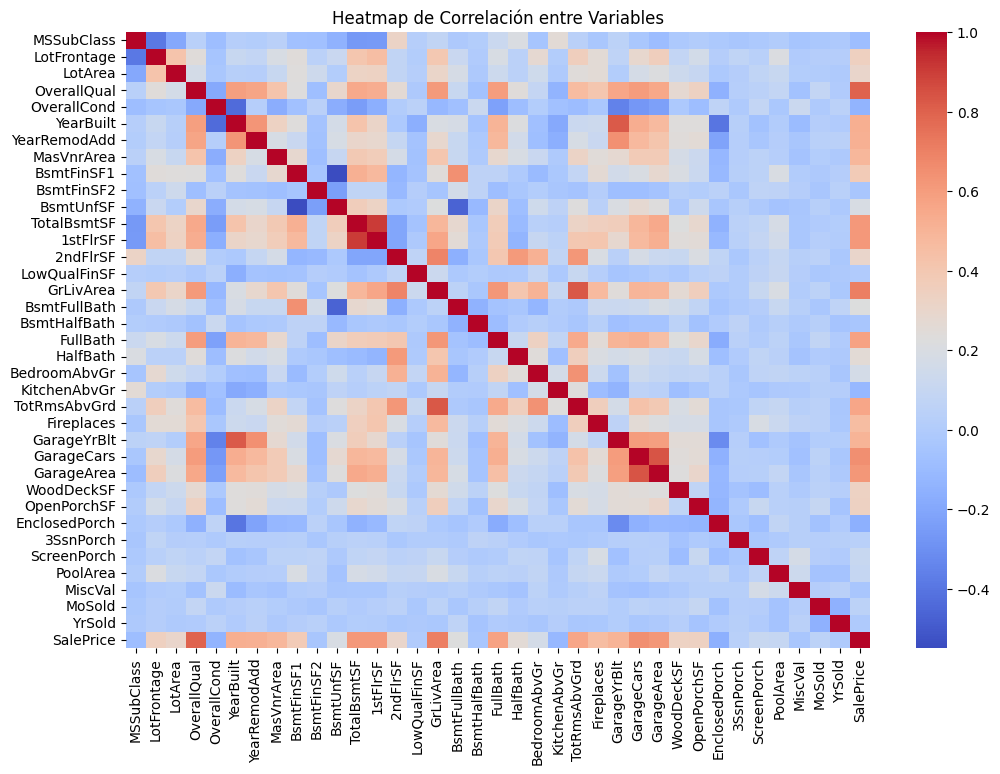

In [ ]:
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numeric.corr()

# Graficar el heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")

plt.title("Heatmap de Correlación entre Variables")
plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)


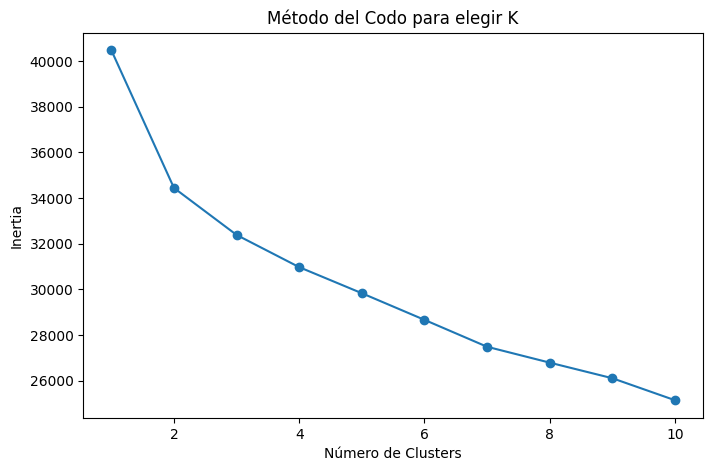

In [ ]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Gráfica del "Elbow Method"
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Inertia")
plt.title("Método del Codo para elegir K")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_scaled)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_numeric, df_numeric["Cluster"])
print(f"Puntuación de Silueta: {silhouette_avg:.4f}")


Puntuación de Silueta: 0.3608


In [ ]:
cluster_summary = df_numeric.groupby("Cluster").mean()
print(cluster_summary)

         MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
Cluster                                                                    
0         53.796642    66.082090   8881.680970     5.277985     5.994403   
1         64.381313    68.002525   9295.436869     6.803030     5.121212   
2         43.672840    92.975309  16316.129630     8.098765     5.302469   

           YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
Cluster                                                                 ...   
0        1949.240672   1972.667910   50.817164  375.602612   58.850746  ...   
1        1995.654040   1998.085859   99.020202  378.664141   30.941919  ...   
2        1992.265432   2000.000000  331.679012  858.320988   35.240741  ...   

         WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Cluster                                                                   
0         63.886194    21.951493      36.919776   2.347015    15.554104  

El análisis de clustering en el dataset muestra que los datos no se agrupan en clusters bien diferenciados. La puntuación de silueta de 0.36 indica un alto solapamiento entre grupos, lo que sugiere que no existen patrones claros. Esto se debe a que el dataset está diseñado para predicción de precios mediante regresión, ya que factores como la ubicación, el tamaño y la calidad de construcción afectan el precio de manera continua, en lugar de formar grupos homogéneos. Además, K-Means asume que los clusters tienen formas esféricas y distribuciones similares, lo que no es adecuado para estos datos.

### Division de dataset

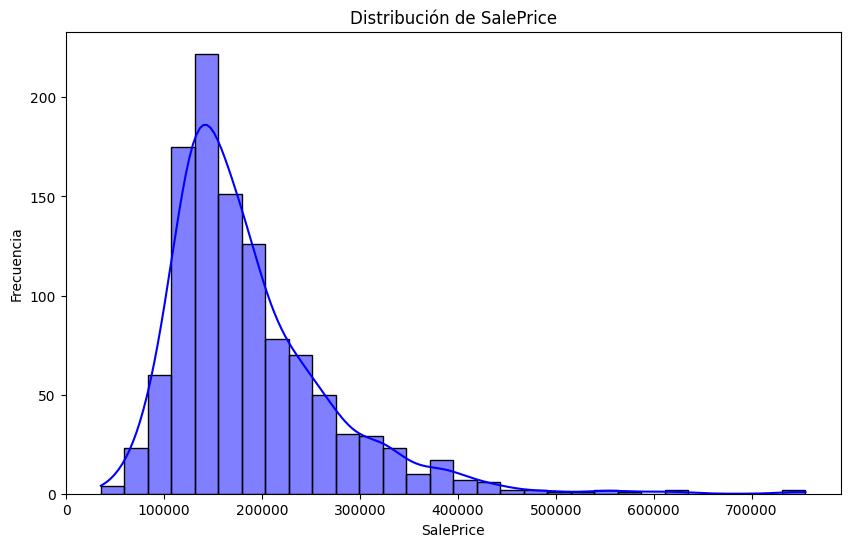

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["SalePrice"], bins=30, kde=True, color="blue")
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de SalePrice")
plt.show()


El histograma muestra que la variable SalePrice (la cual es nuestra variable objetivo) está sesgada a la derecha, lo que significa que hay más casas con precios bajos y menos casas con precios muy altos. Esto sugiere que los datos no están distribuidos de manera uniforme y que existen outliers en el extremo derecho. Procederemos a hacer una division estratificada para evitar cualquier tipo de sesgo.

In [96]:
# Crear cuartiles de precios (se pueden ajustar los rangos según el dataset)
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])

# División estratificada
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned["SalePriceCategory"])

# Verificar la proporción en cada conjunto
print(train_set["SalePriceCategory"].value_counts(normalize=True))
print(test_set["SalePriceCategory"].value_counts(normalize=True))


SalePriceCategory
Bajo          0.253714
Medio-Alto    0.250286
Alto          0.250286
Medio-Bajo    0.245714
Name: proportion, dtype: float64
SalePriceCategory
Bajo          0.255708
Medio-Alto    0.251142
Medio-Bajo    0.246575
Alto          0.246575
Name: proportion, dtype: float64


C:\Users\Gerax\AppData\Local\Temp\ipykernel_1832\3610579959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])


La distribución de SalePrice se mantiene estable en ambos conjuntos, evitando sesgos en el modelo. Si la división hubiera sido aleatoria sin estratificación, podria haber resultado en un conjunto de prueba con más casas de precio bajo o alto, afectando el aprendizaje del modelo, pudiendo llegar a sesgarlo. 

In [ ]:
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

Se necesita calcular el total de metros cuadrados de la casa debido a que la variable que ya existe llamda GrLivArea, esto solo toma en cuenta los metros cuadrados arriba del suelo, por lo que si la casa tuviera sotano esta variable lo obviaria.

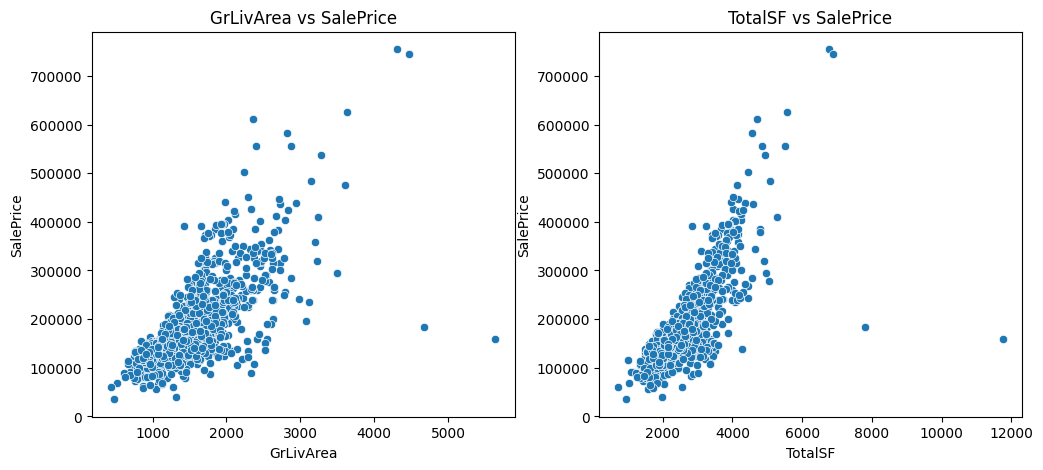

In [103]:
# Comparar la relación entre SalePrice y diferentes variables de área
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_cleaned["GrLivArea"], y=df_cleaned["SalePrice"])
plt.title("GrLivArea vs SalePrice")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_cleaned["TotalSF"], y=df_cleaned["SalePrice"])
plt.title("TotalSF vs SalePrice")

plt.show()

Ambas graficas muestran la relacion entre el precio de venta y una variable que representa el tamaño de la casa. Se puede observar como ambas graficas tienen tendencias positiva. GrLivArea representa datos mas dipersos y parece tener una buena relacion pero esta incompleta porque le faltan los sotanos. En cambio TotalSF tiene datos mas concentrados , siguien existiendo los valores atipicos pero esta tiene una relacion mas clara.

In [ ]:
# Seleccionar solo variables numéricas
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Calcular correlación con SalePrice
correlation_matrix = df_numeric.corr()

# Ordenar de mayor a menor correlación con SalePrice
correlation_with_price = correlation_matrix["SalePrice"].sort_values(ascending=False)
print(correlation_with_price)

SalePrice        1.000000
OverallQual      0.795437
TotalSF          0.773672
GrLivArea        0.707481
GarageCars       0.652103
GarageArea       0.620772
TotalBsmtSF      0.617741
1stFlrSF         0.617692
FullBath         0.578299
TotRmsAbvGrd     0.560521
YearBuilt        0.523434
YearRemodAdd     0.519806
GarageYrBlt      0.502248
MasVnrArea       0.485409
Fireplaces       0.458182
BsmtFinSF1       0.378678
LotFrontage      0.343978
OpenPorchSF      0.338600
WoodDeckSF       0.330286
2ndFlrSF         0.302569
LotArea          0.302268
HalfBath         0.259469
BsmtFullBath     0.223948
BsmtUnfSF        0.191247
BedroomAbvGr     0.168489
ScreenPorch      0.106479
PoolArea         0.092085
MoSold           0.052584
3SsnPorch        0.033947
LowQualFinSF    -0.003541
YrSold          -0.006723
MiscVal         -0.036001
BsmtFinSF2      -0.036923
BsmtHalfBath    -0.041341
MSSubClass      -0.089478
KitchenAbvGr    -0.115382
OverallCond     -0.138511
EnclosedPorch   -0.161711
Name: SalePr

Al analizar la relación entre las variables y el precio de venta, se seleccionaron aquellas con una correlación r > 0.6, ya que representan las características con mayor impacto en el valor final de la propiedad. Las variables con una correlación entre 0.3 < r < 0.6 también pueden aportar información útil, aunque su influencia es menor.

Con base en este criterio, las variables seleccionadas para el modelo son:
- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearBuilt
- YearRemodAdd
- Fireplaces

Algunas variables con r > 0.6 fueron eliminadas para evitar redundancia. Por ejemplo, GrLivArea, TotalBsmtSF y 1stFlrSF ya están representadas en TotalSF, por lo que fueron descartadas. De manera similar, aunque GarageArea tiene una correlación significativa con SalePrice, se prefirió GarageCars, ya que tiene una relación más fuerte y representa mejor la capacidad del garaje.

## Analisis de correlación

Se puede empezar con evaluar que variables si exiben un patrón de relación con la variable objetivo de Precio de venta. Para ello si imprimieron las diferentes relaciones de todas las variables con la variable Precio de venta, y del que puede observer abajo que los metros cuadrados, Area de Lote y area de garage siguen un compartamiento lineal. 

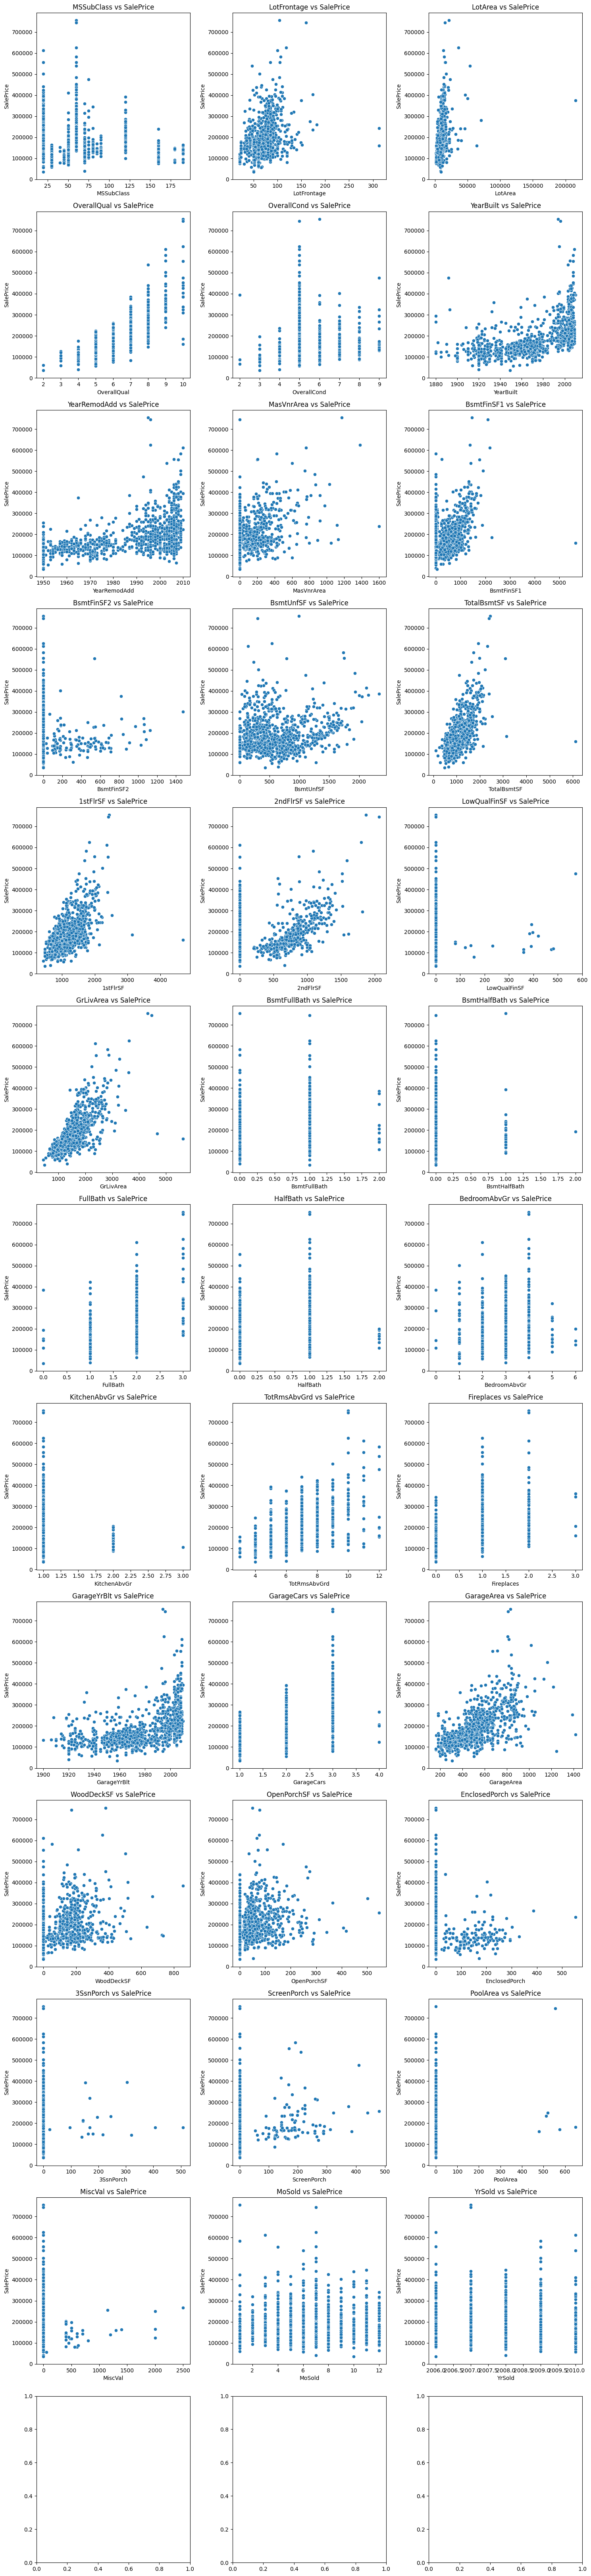

In [82]:
# Define the columns you're interested in (SalePrice + other numeric columns)
columns_of_interest = ['SalePrice'] + [col for col in numeric_cols if col != 'SalePrice']

# Calculate the number of rows and columns for the grid
num_vars = len(columns_of_interest)
num_cols = 3  # You can adjust this number to fit your screen/figure
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through each numeric column and plot the scatter plot with SalePrice
for i, var in enumerate(columns_of_interest[1:]):  # Skip 'SalePrice' itself
    sns.scatterplot(x=df_cleaned[var], y=df_cleaned['SalePrice'], ax=axes[i])
    axes[i].set_title(f"{var} vs SalePrice")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Modelado univeriado

Del analisis previo de variables se decidio que se usara el area total del a vivienda como principal predictor del precio para este primer modelo por ser de los modelos que exhibian un patrón lineal más ordenado.

In [ ]:
X_train = df_cleaned.drop('SalePrice', axis=1) 
y_train = df_cleaned['SalePrice'] 

X_test = test_cleaned.select_dtypes(include=['number']).columns


y_test = None 

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test is:", y_test)

X_train shape: (1094, 72)
X_test shape: (1109, 72)
y_train shape: (1094,)
y_test is: None


In [97]:
categorical_cols = df_cleaned.select_dtypes(exclude=['number']).columns

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

X_train = df_cleaned[numeric_cols]
y_train = df_cleaned['SalePrice']

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BldgType
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- ...
Feature names seen at fit time, yet now missing:
- SalePrice


In [91]:
print(len(model.get_params()))
print(predictions)

4
[208500. 181500. 223500. ... 266500. 142125. 147500.]


### Modela multivariado